# BWM Aufgabe 2
minimize $\dfrac{ab}{c}+\dfrac{bc}{a}+\dfrac{ac}{b}$

### SOLUTION:
$a = b = c = \dfrac{\sqrt{3}}{3}$

In [26]:
from sympy import *
init_session(quiet = True)
a, b, c, d, e = symbols('a b c d e')
expression = a*b/c+b*c/a+a*c/b
newexpression = expression.subs(c, sqrt(1-a**2-b**2))
diffa = diff(newexpression, a)
diffb = diff(newexpression, b)

Wir haben nun den Gradient unseres Ausdrucks berechnet. An Stellen, wo sowohl diffa als auch diffb 0 sind, könnte sich ein Maximum befinden. Also ermitteln wir alle Möglichkeiten für a(b), sodass $f_a(a(b), b) = 0$. Dann substituieren wir der Reihe nach in $f_b(a,b)$ a mit einem unserer $a(b)$ und ermitteln die Nullstellen.

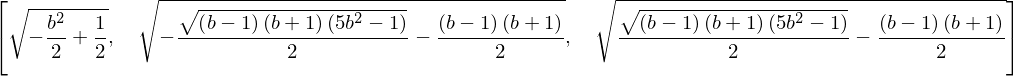

In [91]:
asolutions = solve(diffa, a)
asolutions = [asolutions[1],asolutions[3],asolutions[5]] #all positive solutions
solutions = []
for solution in asolutions:
    temp = diffb.subs(a, solution)#f_b(a,b) mit a = a(b)
    if simplify(temp) != 0:
        bsolutions = solve(temp,b)
        for bsolution in bsolutions:
            if bsolution > 0:
                asolution = solution.subs(b, bsolution)
                if asolution > 0:
                    solutions.append((asolution, bsolution))
    else:#temp ist in jedem fall 0, egal was b ist
        solutions.append("alle loesungen moeglich")
asolutions

Wir kennen nun alle Möglichkeiten, wie $a(b)$ sein kann, damit $f_a(a(b), b)= 0$.
Nun überprüfen wir, wie viele Nullstellen es für $0<b<1$ gibt.
Damit asolutions[1] nicht komplex wird, muss $b<\frac{1}{\sqrt{5}}$ sein.
Für alle solchen Werte

In [92]:
for i in asolutions:
    print(i)

sqrt(-b**2/2 + 1/2)
sqrt(-sqrt((b - 1)*(b + 1)*(5*b**2 - 1))/2 - (b - 1)*(b + 1)/2)
sqrt(sqrt((b - 1)*(b + 1)*(5*b**2 - 1))/2 - (b - 1)*(b + 1)/2)


Nun kennen wir alle Werte für $a$ und $b$, an denen $f_a = f_b = 0$ und $0 < a, b < 1$ gilt.
Es bleibt nur noch zu zeigen, dass $f_{aa}*f_{bb}-f_{ab}^2>0$ und $f_{aa}> 0$.

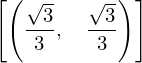

In [33]:
minima = []
diffaa = diff(diffa, a)
diffba = diff(diffb, a)
diffbb = diff(diffb, b)
for solution in solutions:
    valueaa = diffaa.subs(a, solution[0])
    valueaa = valueaa.subs(b, solution[1])
    valueba = diffba.subs(a, solution[0])
    valueba = valueba.subs(b, solution[1])
    valuebb = diffbb.subs(a, solution[0])
    valuebb = valuebb.subs(b, solution[1])
    discriminant = valueaa*valuebb-valueba**2
    if discriminant > 0 and valueaa > 0:
        minima.append(solution)
minima

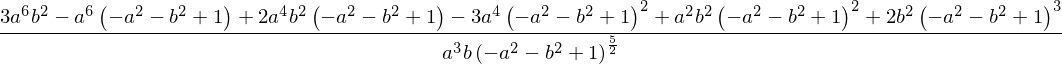

In [35]:
simplify(diffaa)

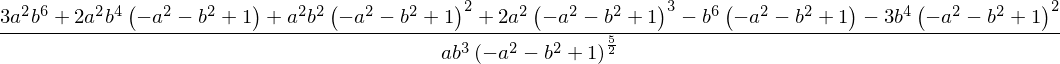

In [36]:
simplify(diffbb)

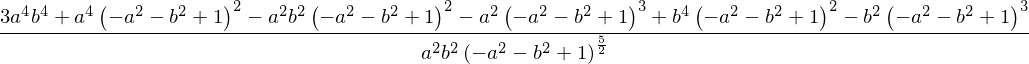

In [38]:
simplify(diffba)

Compute Hessian Matrix $\to$ not convex

In [60]:
hessian = Matrix(2,2,[diffaa, diffba, diffba, diffbb])
polynomial = (factor(simplify(expand(simplify(hessian.det()))))*(a**4*b**4*(a**2+b**2-1)**4)).subs(a**2, x).subs(b**2, y)

In [ ]:
polynom = collect(simplify(expand(diffa * a**2 *b*sqrt(-a**2-b**2+1)*(a**2+b**2-1))),a)
x, y = symbols('x y')
polynom = polynom.subs(a**2, x)
polynom = polynom.subs(b**2, y)
factor(polynom)

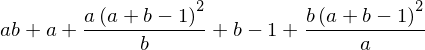

In [114]:
S = (a*b)**2+(b*c)**2+(a*c)**2-a*b*c
S = S.subs(c, 1-a-b)
solutions = solve(S,a)
simplify(S/(a*b))

In [115]:
expand((a+b+c)**2)

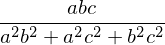

In [118]:
simplify(1/expression)